## Классификация новостей [AG's News Topic Classification Dataset](https://github.com/mhjabreel/CharCnn_Keras/tree/master/data/ag_news_csv)

Используется три архитектуры нейронных сетей:
- Одномерная сверточная нейросеть
- Рекуррентная нейросеть LSTM
- Рекуррентная нейросеть GRU

Для ускорения обучения сети рекомендуется подключить GPU (Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU).

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# Максимальное количество уникальных слов слов
num_words = 10000
# Максимальная длина новости
max_news_len = 30
# Количество классов новостей
nb_classes = 4

## Загрузка набора данных

Загружаем данные для обучения

In [ ]:
!wget https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/train.csv -O train.csv

--2024-11-12 08:52:08--  https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/train.csv
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv [following]
--2024-11-12 08:52:09--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29470338 (28M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  28.10M  --.-KB/s    in 0.1s    

2024-11-12 08:52:11 (267 MB/s) - ‘train.csv’ saved [29470338/29470338]



Загружаем данные для тестирования

In [ ]:
!wget https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/test.csv -O test.csv

--2024-11-12 08:52:14--  https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/test.csv
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/test.csv [following]
--2024-11-12 08:52:15--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1857427 (1.8M) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>]   1.77M  --.-KB/s    in 0.009s  

2024-11-12 08:52:15 (192 MB/s) - ‘test.csv’ saved [1857427/1857427]



Загружаем имена классов

In [ ]:
!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/classes.txt -O classes.txt

--2024-11-12 08:52:19--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31 [text/plain]
Saving to: ‘classes.txt’

classes.txt         100%[===================>]      31  --.-KB/s    in 0s      

2024-11-12 08:52:19 (695 KB/s) - ‘classes.txt’ saved [31/31]



## Просматриваем данные

In [ ]:
!ls

classes.txt  sample_data  test.csv  train.csv


In [ ]:
!cat classes.txt

World
Sports
Business
Sci/Tech


In [ ]:
!head train.csv

"3","Wall St. Bears Claw Back Into the Black (Reuters)","Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again."
"3","Carlyle Looks Toward Commercial Aerospace (Reuters)","Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market."
"3","Oil and Economy Cloud Stocks' Outlook (Reuters)","Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums."
"3","Iraq Halts Oil Exports from Main Southern Pipeline (Reuters)","Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday."
"3","Oil prices soar to all-time record, posing new menace to US e

In [ ]:
!head test.csv

"3","Fears for T N pension after talks","Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul."
"4","The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com)","SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the  #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket."
"4","Ky. Company Wins Grant to Study Peptides (AP)","AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins."
"4","Prediction Unit Helps Forecast Wildfires (AP)","AP - It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. Lightning wil

In [ ]:
!wc -l train.csv
!wc -l test.csv

120000 train.csv
7600 test.csv


## Загружаем данные в память

Читаем данные из файла

In [ ]:
train = pd.read_csv('train.csv',
                    header=None,
                    names=['class', 'title', 'text'])

In [ ]:
train

,class,title,text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


Выделяем данные для обучения

In [ ]:
news = train['text']
# news = train['title'] + ' ' + train['text']

In [ ]:
news[:5]

,text
0,"Reuters - Short-sellers, Wall Street's dwindli..."
1,Reuters - Private investment firm Carlyle Grou...
2,Reuters - Soaring crude prices plus worries\ab...
3,Reuters - Authorities have halted oil export\f...
4,"AFP - Tearaway world oil prices, toppling reco..."


Выделяем правильные ответы

In [ ]:
# Преобразование целочисленного вектора класса в двоичную матрицу
# Аргументы: вектор классов в данных и общее количество классов
y_train = utils.to_categorical(train['class'] - 1, nb_classes)

In [ ]:
y_train

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

## Токенизация текста

In [ ]:
news[:5]

0    Reuters - Short-sellers, Wall Street's dwindli...
1    Reuters - Private investment firm Carlyle Grou...
2    Reuters - Soaring crude prices plus worries\ab...
3    Reuters - Authorities have halted oil export\f...
4    AFP - Tearaway world oil prices, toppling reco...
Name: text, dtype: object

Создаем токенизатор Keras

<img src="https://habrastorage.org/r/w1560/getpro/habr/upload_files/bc9/feb/314/bc9feb3143af4759aceff629305cf8ae.png">

Принцип работы модуля TextVectorization

In [ ]:
vectorize_layer = tf.keras.layers.TextVectorization(max_tokens=num_words,
    output_mode='int',
    output_sequence_length=max_news_len)

In [ ]:
vectorize_layer.adapt(news)
vectorize_layer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'a',
 'to',
 'of',
 'in',
 'and',
 'on',
 'for',
 'that',
 '39s',
 'with',
 'as',
 'its',
 'at',
 'is',
 'said',
 'by',
 'it',
 'has',
 'new',
 'an',
 'from',
 'his',
 'us',
 'will',
 'was',
 'reuters',
 'after',
 'have',
 'be',
 'their',
 'are',
 'over',
 'ap',
 'he',
 'but',
 'two',
 'first',
 'this',
 'more',
 'monday',
 'wednesday',
 'tuesday',
 'thursday',
 'company',
 'up',
 'friday',
 'inc',
 'one',
 'world',
 'yesterday',
 'they',
 'last',
 'york',
 'against',
 'than',
 'about',
 'who',
 'were',
 'not',
 'into',
 'year',
 'been',
 'president',
 'out',
 'had',
 'when',
 'million',
 'oil',
 'corp',
 'united',
 'would',
 'sunday',
 'which',
 'week',
 'years',
 'today',
 'people',
 'three',
 'government',
 'could',
 'quot',
 'group',
 'time',
 'no',
 'percent',
 'game',
 'saturday',
 'software',
 'night',
 'or',
 'prices',
 'iraq',
 'next',
 'security',
 'announced',
 'minister',
 'some',
 'microsoft',
 'season',
 'team',
 'second',
 'internet',
 'internatio

In [ ]:
tokenizer = Tokenizer(num_words=num_words)

Обучаем токенизатор на новостях

In [ ]:
tokenizer.fit_on_texts(news)

Просматриваем словарь токенизатора

In [ ]:
tokenizer.word_index

{'the': 1,
 'a': 2,
 'to': 3,
 'of': 4,
 'in': 5,
 'and': 6,
 'on': 7,
 'for': 8,
 '39': 9,
 's': 10,
 'that': 11,
 'with': 12,
 'as': 13,
 'its': 14,
 'at': 15,
 'said': 16,
 'is': 17,
 'by': 18,
 'it': 19,
 'has': 20,
 'new': 21,
 'an': 22,
 'from': 23,
 'reuters': 24,
 'his': 25,
 'will': 26,
 'was': 27,
 'after': 28,
 'have': 29,
 'be': 30,
 'their': 31,
 'two': 32,
 'are': 33,
 'us': 34,
 'over': 35,
 'quot': 36,
 'year': 37,
 'first': 38,
 'ap': 39,
 'he': 40,
 'but': 41,
 'gt': 42,
 'lt': 43,
 'this': 44,
 'more': 45,
 'monday': 46,
 'wednesday': 47,
 'one': 48,
 'tuesday': 49,
 'up': 50,
 'thursday': 51,
 'company': 52,
 'inc': 53,
 'friday': 54,
 'world': 55,
 'than': 56,
 'u': 57,
 '1': 58,
 'last': 59,
 'they': 60,
 'york': 61,
 'yesterday': 62,
 'against': 63,
 'about': 64,
 'who': 65,
 'not': 66,
 'were': 67,
 'into': 68,
 'out': 69,
 'three': 70,
 'been': 71,
 'president': 72,
 '2': 73,
 'had': 74,
 'million': 75,
 'corp': 76,
 'oil': 77,
 'when': 78,
 'week': 79,
 'time'

Преобразуем новости в числовое представление

In [ ]:
sequences = tokenizer.texts_to_sequences(news)

Просматриваем новости в числовом представлении

In [ ]:
index = 1
print(news[index])
print(sequences[index])

Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.
[24, 863, 751, 371, 93, 84, 20, 2, 3916, 8, 453, 431, 6, 1308, 2799, 5, 1, 549, 237, 20, 3528, 2002, 14, 8267, 7, 216, 314, 4, 1, 131]


In [ ]:
tokenizer.word_index['reuters']

24

Ограничиваем длину текста

In [ ]:
x_train = pad_sequences(sequences, maxlen=max_news_len)

In [ ]:
x_train[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,   24,  758, 7851,  433,
        5786, 2861,    4, 5916,   33, 3642,  831,  432],
       [  24,  863,  751,  371,   93,   84,   20,    2, 3916,    8,  453,
         431,    6, 1308, 2799,    5,    1,  549,  237,   20, 3528, 2002,
          14, 8267,    7,  216,  314,    4,    1,  131],
       [  24, 2199,  463,  105, 1568, 1484,   64,    1,  397,    6,    1,
        1026,    8,  317,   33,  178,    3, 6377,   35,    1,  311,  131,
          99,   79,  189,    1, 6120,    4,    1, 1068],
       [   0,   24,  713,   29, 5142,   77, 3549, 7993,   23,    1,  737,
        3199,    5,  493,  106,   28, 1402,  573,    2,  825, 2601,   90,
         760, 2559,   22,   77,  292,   16,    7,   97],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  165,
          55,   77,  105, 8851, 1776,    6, 8268, 3454,    2,   21,  343,
        3036,   70,  266,  151, 

## Сверточная нейронная сеть

In [ ]:
model_cnn = keras.Sequential()
model_cnn.add(keras.layers.Embedding(num_words, 32, input_length=max_news_len))
model_cnn.add(keras.layers.Conv1D(250, 5, padding='valid', activation='relu'))
model_cnn.add(keras.layers.GlobalMaxPooling1D())
model_cnn.add(keras.layers.Dense(128, activation='relu'))
model_cnn.add(keras.layers.Dense(4, activation='softmax'))

In [ ]:
model_cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 32)            320000    
                                                                 
 conv1d (Conv1D)             (None, 26, 250)           40250     
                                                                 
 global_max_pooling1d (Glob  (None, 250)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 128)               32128     
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 392894 (1.50 MB)
Trainable params: 392894 (1.50 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл `best_model.h5`

In [ ]:
# model_cnn_save_path = 'best_model_cnn.h5'
checkpoint_filepath_cnn = '/tmp/ckpt/checkpoint.model_cnn.keras'
checkpoint_callback_cnn = ModelCheckpoint(checkpoint_filepath_cnn,
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [ ]:
history_cnn = model_cnn.fit(x_train,
                            y_train,
                            epochs=5,
                            batch_size=128,
                            validation_split=0.1,
                            callbacks=[checkpoint_callback_cnn])

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7306 - loss: 0.6694
Epoch 1: val_accuracy improved from -inf to 0.88658, saving model to /tmp/ckpt/checkpoint.model.keras
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7307 - loss: 0.6691 - val_accuracy: 0.8866 - val_loss: 0.3093
Epoch 2/5
841/844 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9150 - loss: 0.2497
Epoch 2: val_accuracy did not improve from 0.88658
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9150 - loss: 0.2497 - val_accuracy: 0.8852 - val_loss: 0.3171
Epoch 3/5
837/844 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9357 - loss: 0.1898
Epoch 3: val_accuracy did not improve from 0.88658
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9356 - loss: 0.1899 - val_accuracy: 0.8842 - val_loss: 0.3346
Epoch 4/5
828/844 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9542 - loss: 0.1363
Epoch 4: val_accuracy did not improve from 0.88658
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 

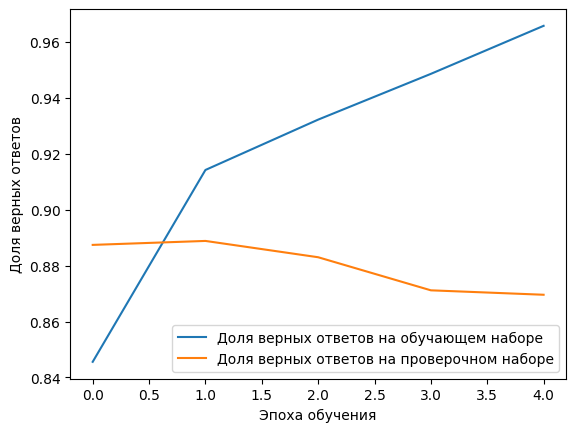

In [ ]:
plt.plot(history_cnn.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_cnn.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Cеть LSTM

In [ ]:
model_lstm = keras.Sequential()
model_lstm.add(keras.layers.Embedding(num_words, 32, input_length=max_news_len))
model_lstm.add(keras.layers.LSTM(16))
model_lstm.add(keras.layers.Dense(4, activation='softmax'))

In [ ]:
model_lstm.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 32)            320000    
                                                                 
 lstm (LSTM)                 (None, 16)                3136      
                                                                 
 dense_2 (Dense)             (None, 4)                 68        
                                                                 
Total params: 323204 (1.23 MB)
Trainable params: 323204 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл `best_model.h5`

In [ ]:
# model_lstm_save_path = 'best_model_lstm.h5'
checkpoint_filepath_lstm = '/tmp/ckpt/checkpoint.model_lstm.keras'
checkpoint_callback_lstm = ModelCheckpoint(checkpoint_filepath_lstm,
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [ ]:
history_lstm = model_lstm.fit(x_train,
                              y_train,
                              epochs=5,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_lstm])

Epoch 1/5
844/844 [==============================] - ETA: 0s - loss: 0.5286 - accuracy: 0.8035
Epoch 1: val_accuracy improved from -inf to 0.88100, saving model to best_model_lstm.h5
844/844 [==============================] - 24s 24ms/step - loss: 0.5286 - accuracy: 0.8035 - val_loss: 0.3355 - val_accuracy: 0.8810
Epoch 2/5
844/844 [==============================] - ETA: 0s - loss: 0.2779 - accuracy: 0.9105
Epoch 2: val_accuracy improved from 0.88100 to 0.88800, saving model to best_model_lstm.h5
844/844 [==============================] - 8s 9ms/step - loss: 0.2779 - accuracy: 0.9105 - val_loss: 0.3160 - val_accuracy: 0.8880
Epoch 3/5
844/844 [==============================] - ETA: 0s - loss: 0.2383 - accuracy: 0.9229
Epoch 3: val_accuracy did not improve from 0.88800
844/844 [==============================] - 7s 8ms/step - loss: 0.2383 - accuracy: 0.9229 - val_loss: 0.3283 - val_accuracy: 0.8860
Epoch 4/5
844/844 [==============================] - ETA: 0s - loss: 0.2137 - accuracy: 0.

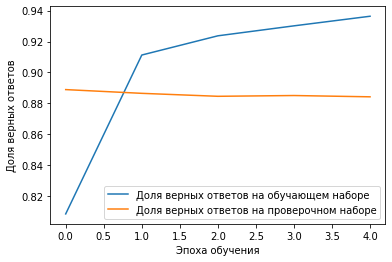

In [ ]:
plt.plot(history_lstm.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_lstm.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Cеть GRU

In [ ]:
model_gru = keras.Sequential()
model_gru.add(keras.layers.Embedding(num_words, 32, input_length=max_news_len))
model_gru.add(keras.layers.GRU(16))
model_gru.add(keras.layers.Dense(4, activation='softmax'))

In [ ]:
model_gru.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 30, 32)            320000    
                                                                 
 gru (GRU)                   (None, 16)                2400      
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
Total params: 322,468
Trainable params: 322,468
Non-trainable params: 0
_________________________________________________________________


Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл `best_model_gru.h5`

In [ ]:
# model_gru_save_path = 'best_model_gru.h5'
checkpoint_filepath_gru = '/tmp/ckpt/checkpoint.model_gru.keras'
checkpoint_callback_gru = ModelCheckpoint(checkpoint_filepath_gru,
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [ ]:
history_gru = model_gru.fit(x_train,
                              y_train,
                              epochs=5,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_gru])

Epoch 1/5
837/844 [============================>.] - ETA: 0s - loss: 0.5680 - accuracy: 0.7869
Epoch 1: val_accuracy improved from -inf to 0.87767, saving model to best_model_gru.h5
844/844 [==============================] - 7s 7ms/step - loss: 0.5663 - accuracy: 0.7877 - val_loss: 0.3563 - val_accuracy: 0.8777
Epoch 2/5
844/844 [==============================] - ETA: 0s - loss: 0.3052 - accuracy: 0.9020
Epoch 2: val_accuracy improved from 0.87767 to 0.88383, saving model to best_model_gru.h5
844/844 [==============================] - 5s 6ms/step - loss: 0.3052 - accuracy: 0.9020 - val_loss: 0.3289 - val_accuracy: 0.8838
Epoch 3/5
841/844 [============================>.] - ETA: 0s - loss: 0.2577 - accuracy: 0.9171
Epoch 3: val_accuracy improved from 0.88383 to 0.88492, saving model to best_model_gru.h5
844/844 [==============================] - 5s 6ms/step - loss: 0.2579 - accuracy: 0.9171 - val_loss: 0.3287 - val_accuracy: 0.8849
Epoch 4/5
838/844 [============================>.] - ET

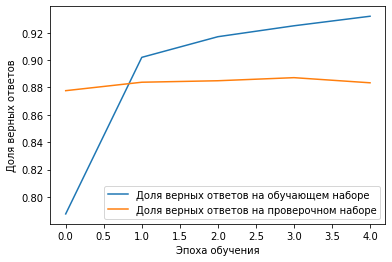

In [ ]:
plt.plot(history_gru.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_gru.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Загружаем набор данных для тестирования

In [ ]:
test = pd.read_csv('test.csv',
                    header=None,
                    names=['class', 'title', 'text'])

In [ ]:
test

,class,title,text
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


Преобразуем новости в числовое представление

Обратите внимание, что нужно использовать токенизатор, обученный на наборе данных train.

In [ ]:
test_sequences = tokenizer.texts_to_sequences(test['text'])

In [ ]:
x_test = pad_sequences(test_sequences, maxlen=max_news_len)

In [ ]:
x_test[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0, 2020, 3371,  449,   15, 6956,  252,   60,   33,
          28,  289,   12, 9088, 2184,  371,  169, 9284],
       [  92,  119,    4, 3472,    8,    1,  402,  134,   75, 5471, 1516,
        1227,    2, 3436,    8, 2744, 5220,  230,  936,   20, 2148,  117,
           1,   38,  561, 1974,    8,   14, 3957, 1218],
       [   2,   52, 5787,   18,    2, 4914,   15,    1,  525,    4, 4586,
         227,    2, 3922,    3, 1316,    2, 6888,    4, 2893,  576,   84,
          33,  758, 6515,    4,    1, 1013, 5154,    4],
       [9642, 1291,    6, 8714,   41,  671,   40, 2977,  177,    1,  108,
          26, 1027, 7300,   26,  760,    5, 3356,   40, 1271, 2450,   26,
        2170,   50, 3356,   26, 7415,    6, 9153,   26],
       [   0,    0,    0,    0,    0,    0,   39,  493, 7343,  832,  400,
         820,   28, 3827,    4,    1, 4474,   54, 9411,    1, 1273,   38,
        1230,    3, 1365,  348, 

Правильные ответы

In [ ]:
y_test = utils.to_categorical(test['class'] - 1, nb_classes)

In [ ]:
y_test

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

## Оцениваем качество работы сети на тестовом наборе данных

### Одномерная сверточная сеть

In [ ]:
model_cnn.load_weights(checkpoint_filepath_cnn)

In [ ]:
model_cnn.evaluate(x_test, y_test, verbose=1)

238/238 [==============================] - 1s 3ms/step - loss: 0.3134 - accuracy: 0.8938


[0.3134206235408783, 0.893815815448761]

### Сеть LSTM

In [ ]:
model_lstm.load_weights(checkpoint_filepath_lstm)

In [ ]:
model_lstm.evaluate(x_test, y_test, verbose=1)

238/238 [==============================] - 1s 3ms/step - loss: 0.3300 - accuracy: 0.8888


[0.33004119992256165, 0.8888157606124878]

### Сеть GRU

In [ ]:
model_gru.load_weights(checkpoint_filepath_gru)

In [ ]:
model_gru.evaluate(x_test, y_test, verbose=1)

238/238 [==============================] - 1s 3ms/step - loss: 0.3177 - accuracy: 0.8949


[0.317663311958313, 0.8948684334754944]

## Задание

1. Попробовать улучшить предсказание моделей за счет использования не только текста, но и заголовка новости.
При этом рекомендуется увеличить максимальню длину текста. <br/>
2. Проверить, как на качеаство предсказания влияет предобработка текста (удаление стоп-слов, пунктуации, лемматизация и др.)
3. Применить методы регуляризации для устранения переобучения моделей.


## Стоп-слова и пунктуация

**Стоп-слова** - это слова, которые часто встречаются практически в любом тексте и не несут полезной информации о конретном документе. Для модели это просто шум. А шум нужно убирать. По аналогичной причине убирают и пунктуацию.

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# импортируем стоп-слова из библиотеки nltk
from nltk.corpus import stopwords

# посмотрим на стоп-слова для английского языка
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

*Знаки* пунктуации лучше импортировать из модуля **String**. В нем хранятся различные наборы констант для работы со строками (пунктуация, алфавит и др.).

In [ ]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'



Объединим стоп-слова и знаки пунктуации вместе и запишем в переменную noise:


In [ ]:
noise = stopwords.words('english') + list(punctuation)

## Лемматизация

**Лемматизация** – это сведение разных форм одного слова к начальной форме – **лемме**. Почему это хорошо?
* Во-первых, естественно рассматривать как отдельный признак каждое *слово*, а не каждую его отдельную форму.
* Во-вторых, некоторые стоп-слова стоят только в начальной форме, и без лематизации выкидываем мы только её.

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
news = list(lemmatizer.lemmatize(word) for word in news)

## Полезные ссылки

1. [Как понять LSTM сети](https://alexsosn.github.io/ml/2015/11/17/LSTM.html)
2. [Рекуррентные нейронные сети в Keras](https://keras.io/layers/recurrent/)
3. [Регуляризуем правильно!](https://telegra.ph/Regulyarizuem-pravilno-09-20)
4. [12 основных методов Dropout](https://towardsdatascience.com/12-main-dropout-methods-mathematical-and-visual-explanation-58cdc2112293?source=topic_page---------6------------------1)